# Definição do problema:

Otimizar decisões estratégicas e melhorar a eficiência operacional, com foco em maximizar o desempenho da empresa, pensando, principalmente, em solucionar as dores do cliente

# Importação dos dados:

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
import pandas as pd
df = pd.read_excel('Base_Kaiserhaus.xlsx')
df

,macro_bairro,nome_cliente,bairro_destino,order_datetime,platform,order_mode,distance_km,tempo_preparo_minutos,status,eta_minutes_quote,actual_delivery_minutes,total_brl,classe_pedido,platform_commission_pct,num_itens,satisfacao_nivel
0,Outros,Júlia Ramos,Bela Vista,2024-01-01 15:08:00,rappi,delivery,6.916192,34,delivered,50,62.4,288.01,familia,0.16,8,3
1,Santo Amaro,Gustavo R. Rezende,Santo Amaro,2024-01-02 07:49:00,ifood,delivery,5.753085,16,delivered,45,35.6,125.02,combo,0.16,3,5
2,Jardins,Valentina Y. Oliveira,Jardins,2024-01-02 10:14:00,ifood,delivery,4.545672,15,delivered,43,34.5,110.76,combo,0.12,4,5
3,Vila Olímpia,Mariana Moreira,Vila Olímpia,2024-01-02 10:58:00,site_proprio,retirada,0.059679,6,delivered,19,14.4,45.16,prato_unico,0.00,1,5
4,Moema,Daniel Rocha,Ibirapuera,2024-01-02 12:56:00,site_proprio,retirada,0.102063,25,delivered,28,26.6,123.12,combo,0.00,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Moema,Natália G. Souza,Ibirapuera,2024-12-31 17:17:00,rappi,delivery,3.231895,17,delivered,37,29.0,56.43,prato_unico,0.16,3,5
4996,Morumbi,Yasmin N. Ribeiro,Morumbi,2024-12-31 19:33:00,whatsapp,retirada,0.218583,6,delivered,18,10.7,75.58,prato_unico,0.00,2,5
4997,Pinheiros,Yuri Castro,Pinheiros,2024-12-31 20:12:00,ifood,delivery,6.389462,28,canceled,47,67.1,145.75,combo,0.16,4,2
4998,Itaim,Henrique J. Ferreira,Itaim Bibi,2024-12-31 21:14:00,ifood,delivery,4.148569,14,delivered,40,32.9,61.36,prato_unico,0.16,1,5


# Tratamento de dados

In [53]:
df.isnull().sum()

macro_bairro                 0
nome_cliente                 0
bairro_destino               0
order_datetime               0
platform                     0
order_mode                   0
distance_km                323
tempo_preparo_minutos        0
status                       0
eta_minutes_quote            0
actual_delivery_minutes    200
total_brl                    0
classe_pedido                0
platform_commission_pct      0
num_itens                    0
satisfacao_nivel             0
dtype: int64

In [123]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df.isnull().sum()

macro_bairro               0
nome_cliente               0
bairro_destino             0
order_datetime             0
platform                   0
order_mode                 0
distance_km                0
tempo_preparo_minutos      0
status                     0
eta_minutes_quote          0
actual_delivery_minutes    0
total_brl                  0
classe_pedido              0
platform_commission_pct    0
num_itens                  0
satisfacao_nivel           0
dtype: int64

In [55]:
df

,macro_bairro,nome_cliente,bairro_destino,order_datetime,platform,order_mode,distance_km,tempo_preparo_minutos,status,eta_minutes_quote,actual_delivery_minutes,total_brl,classe_pedido,platform_commission_pct,num_itens,satisfacao_nivel
0,Outros,Júlia Ramos,Bela Vista,2024-01-01 15:08:00,rappi,delivery,6.916192,34,delivered,50,62.4,288.01,familia,0.16,8,3
1,Santo Amaro,Gustavo R. Rezende,Santo Amaro,2024-01-02 07:49:00,ifood,delivery,5.753085,16,delivered,45,35.6,125.02,combo,0.16,3,5
2,Jardins,Valentina Y. Oliveira,Jardins,2024-01-02 10:14:00,ifood,delivery,4.545672,15,delivered,43,34.5,110.76,combo,0.12,4,5
3,Vila Olímpia,Mariana Moreira,Vila Olímpia,2024-01-02 10:58:00,site_proprio,retirada,0.059679,6,delivered,19,14.4,45.16,prato_unico,0.00,1,5
4,Moema,Daniel Rocha,Ibirapuera,2024-01-02 12:56:00,site_proprio,retirada,0.102063,25,delivered,28,26.6,123.12,combo,0.00,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Moema,Natália G. Souza,Ibirapuera,2024-12-31 17:17:00,rappi,delivery,3.231895,17,delivered,37,29.0,56.43,prato_unico,0.16,3,5
4996,Morumbi,Yasmin N. Ribeiro,Morumbi,2024-12-31 19:33:00,whatsapp,retirada,0.218583,6,delivered,18,10.7,75.58,prato_unico,0.00,2,5
4997,Pinheiros,Yuri Castro,Pinheiros,2024-12-31 20:12:00,ifood,delivery,6.389462,28,canceled,47,67.1,145.75,combo,0.16,4,2
4998,Itaim,Henrique J. Ferreira,Itaim Bibi,2024-12-31 21:14:00,ifood,delivery,4.148569,14,delivered,40,32.9,61.36,prato_unico,0.16,1,5


# Coleta e exploração dos dados

Análise básica

In [56]:
df['status'].value_counts()

status
delivered     4802
canceled       180
chargeback      18
Name: count, dtype: int64

<Axes: xlabel='status'>

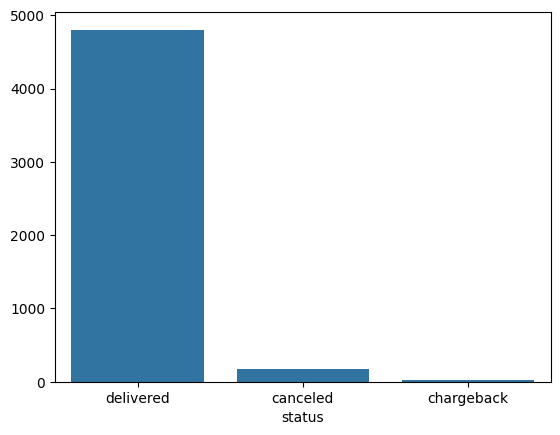

In [57]:
sns.barplot(x=df['status'].value_counts().index, y=df['status'].value_counts().values)

In [58]:
df['order_mode'].value_counts()

order_mode
delivery    4024
retirada     976
Name: count, dtype: int64

<Axes: xlabel='order_mode'>

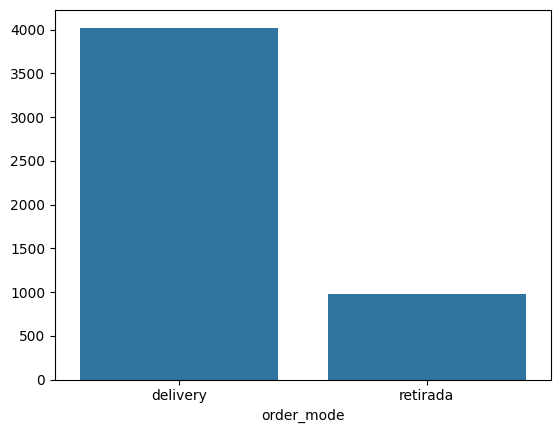

In [59]:
sns.barplot(x=df['order_mode'].value_counts().index, y=df['order_mode'].value_counts().values)

In [60]:
df['platform'].value_counts()

platform
ifood           2661
site_proprio    1052
rappi            747
whatsapp         540
Name: count, dtype: int64

<Axes: xlabel='platform'>

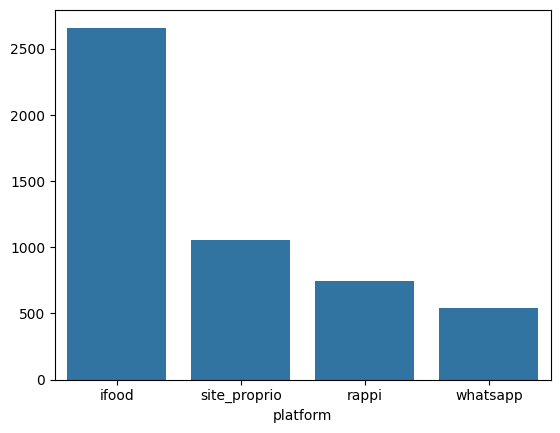

In [61]:
sns.barplot(x=df['platform'].value_counts().index, y=df['platform'].value_counts().values)

In [62]:
df['classe_pedido'].value_counts()

classe_pedido
prato_unico    2775
combo          1716
familia         509
Name: count, dtype: int64

<Axes: xlabel='classe_pedido'>

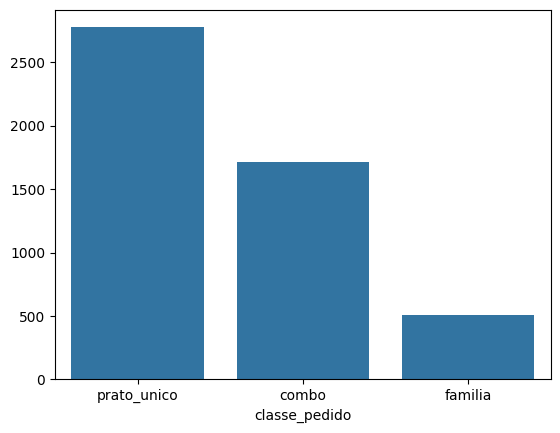

In [63]:
sns.barplot(x=df['classe_pedido'].value_counts().index, y=df['classe_pedido'].value_counts().values)

In [64]:
df['macro_bairro'].value_counts()

macro_bairro
Brooklin        881
Moema           679
Vila Mariana    530
Vila Olímpia    516
Itaim           497
Jardins         403
Pinheiros       393
Santo Amaro     387
Outros          364
Morumbi         350
Name: count, dtype: int64

<Axes: xlabel='macro_bairro'>

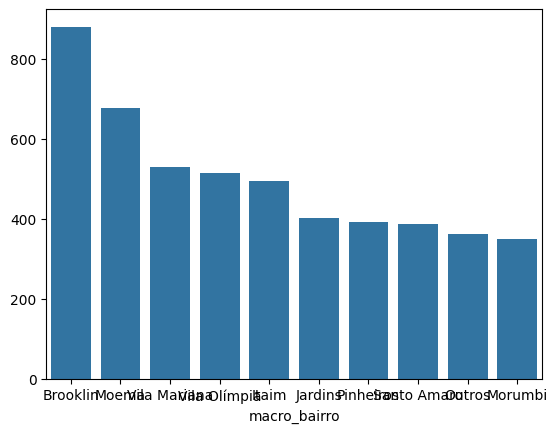

In [65]:
sns.barplot(x=df['macro_bairro'].value_counts().index, y=df['macro_bairro'].value_counts().values)

In [79]:
df['distance_km'].describe()

count    5000.000000
mean        3.510049
std         2.501186
min         0.000002
25%         0.982585
50%         3.510049
75%         5.459546
max         9.949973
Name: distance_km, dtype: float64

<Axes: ylabel='distance_km'>

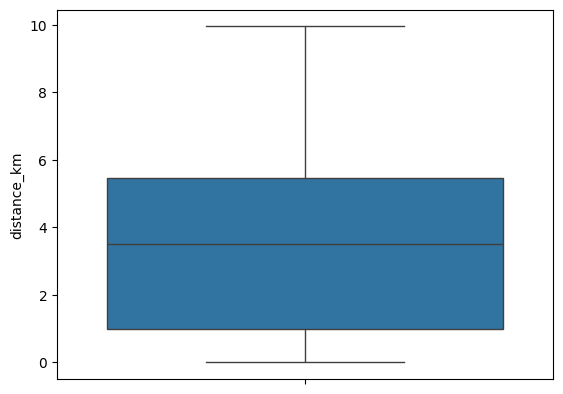

In [103]:
sns.boxplot(data=df, y=df['distance_km'])

<Axes: xlabel='distance_km', ylabel='Count'>

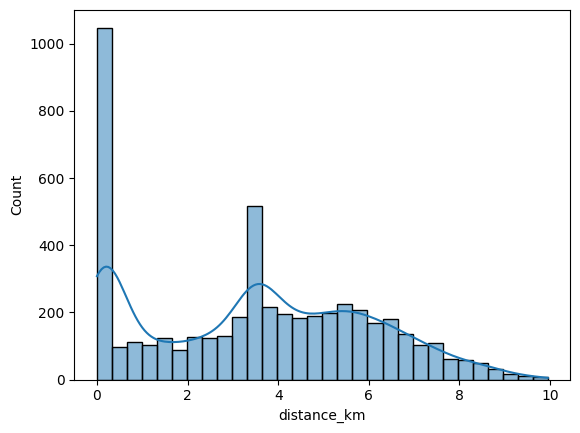

In [85]:
sns.histplot(df['distance_km'], bins=30, kde=True)

In [43]:
df['tempo_preparo_minutos'].describe()

count    5000.0000
mean       16.4228
std         7.9213
min         6.0000
25%        11.0000
50%        15.0000
75%        21.0000
max        57.0000
Name: tempo_preparo_minutos, dtype: float64

<Axes: ylabel='tempo_preparo_minutos'>

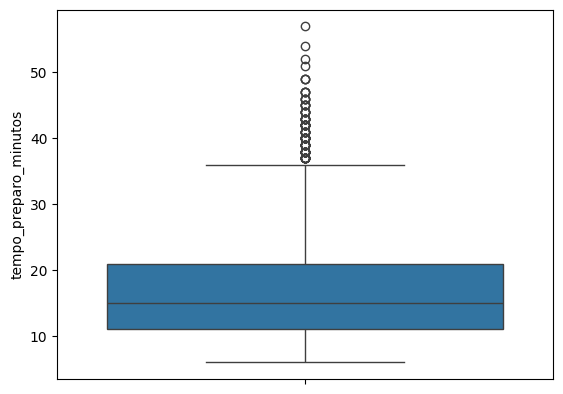

In [104]:
sns.boxplot(data=df, y=df['tempo_preparo_minutos'])

<Axes: xlabel='tempo_preparo_minutos', ylabel='Count'>

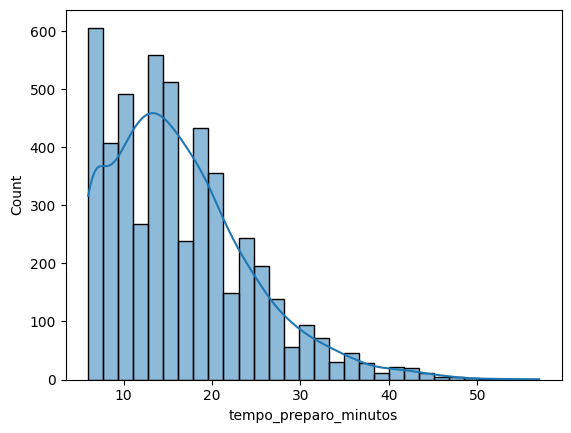

In [86]:
sns.histplot(df['tempo_preparo_minutos'], bins=30, kde=True)

In [44]:
df['eta_minutes_quote'].describe()

count    5000.00000
mean       37.47840
std         8.54654
min        12.00000
25%        32.00000
50%        39.00000
75%        44.00000
max        59.00000
Name: eta_minutes_quote, dtype: float64

<Axes: ylabel='eta_minutes_quote'>

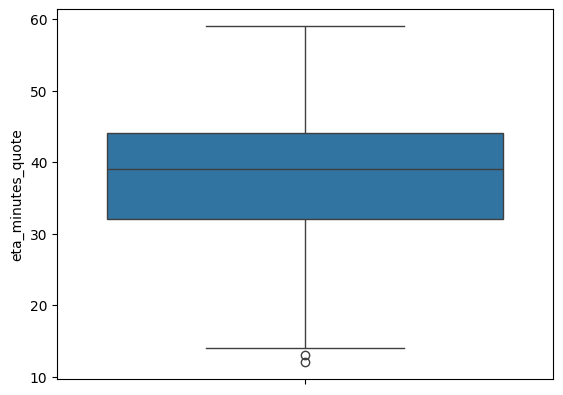

In [105]:
sns.boxplot(data=df, y=df['eta_minutes_quote'])

<Axes: xlabel='eta_minutes_quote', ylabel='Count'>

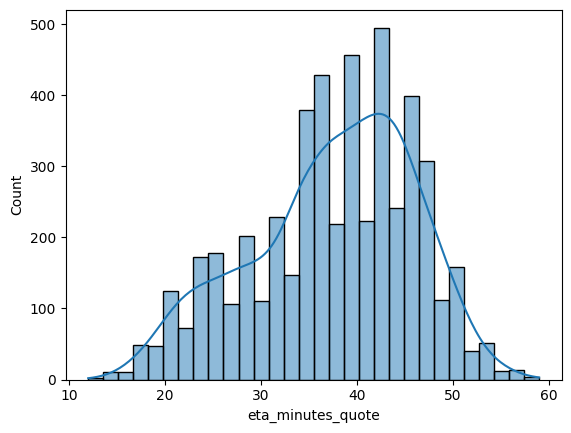

In [88]:
sns.histplot(df['eta_minutes_quote'], bins=30, kde=True)

In [125]:
df['actual_delivery_minutes'].describe()

count    5000.000000
mean       29.524583
std        12.677838
min        -5.700000
25%        20.600000
50%        29.500000
75%        37.300000
max        76.700000
Name: actual_delivery_minutes, dtype: float64

In [128]:
df.loc[df['actual_delivery_minutes'] < 0, 'actual_delivery_minutes'] = df.loc[df['actual_delivery_minutes'] < 0, 'actual_delivery_minutes'] * -1

In [129]:
df['actual_delivery_minutes'].describe()

count    5000.000000
mean       29.531583
std        12.661520
min         0.000000
25%        20.600000
50%        29.500000
75%        37.300000
max        76.700000
Name: actual_delivery_minutes, dtype: float64

<Axes: ylabel='actual_delivery_minutes'>

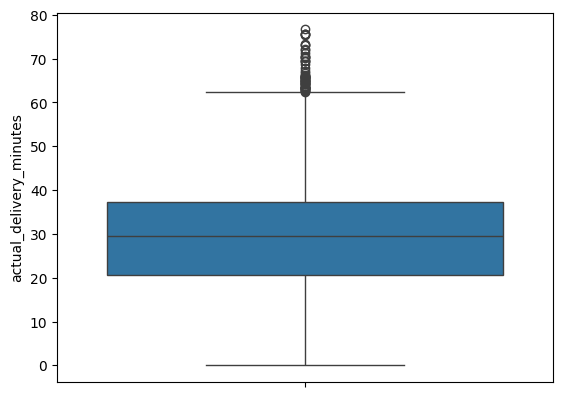

In [130]:
sns.boxplot(data=df, y=df['actual_delivery_minutes'])

<Axes: xlabel='actual_delivery_minutes', ylabel='Count'>

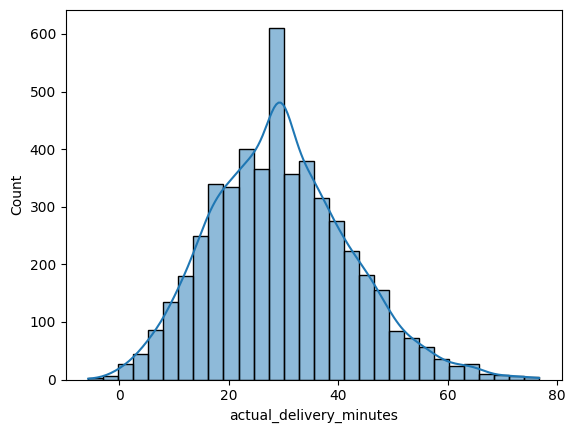

In [89]:
sns.histplot(df['actual_delivery_minutes'], bins=30, kde=True)

In [46]:
df['total_brl'].describe()

count    5000.000000
mean      110.609846
std        53.218753
min        17.380000
25%        72.220000
50%        98.470000
75%       133.915000
max       329.940000
Name: total_brl, dtype: float64

<Axes: ylabel='total_brl'>

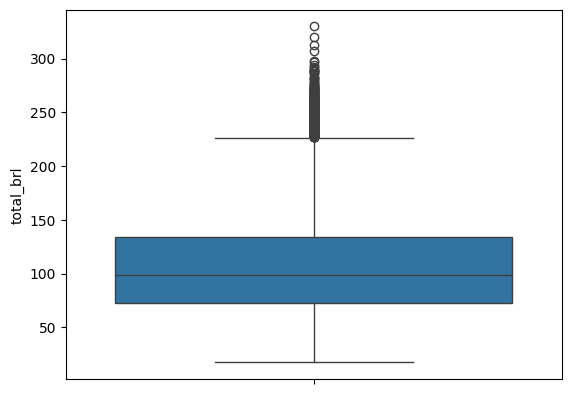

In [107]:
sns.boxplot(data=df, y=df['total_brl'])

<Axes: xlabel='total_brl', ylabel='Count'>

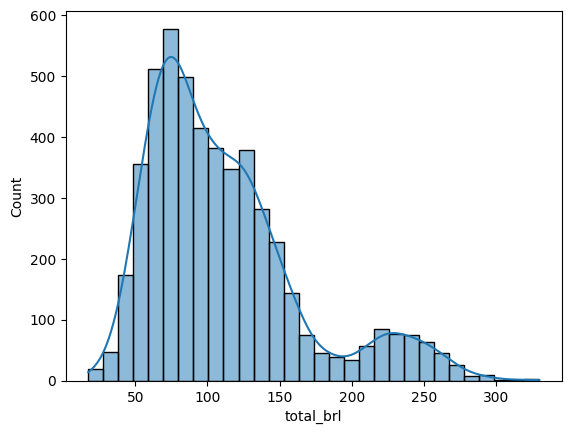

In [90]:
sns.histplot(df['total_brl'], bins=30, kde=True)

In [48]:
df['num_itens'].describe()

count    5000.000000
mean        3.255200
std         1.752452
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        13.000000
Name: num_itens, dtype: float64

<Axes: ylabel='num_itens'>

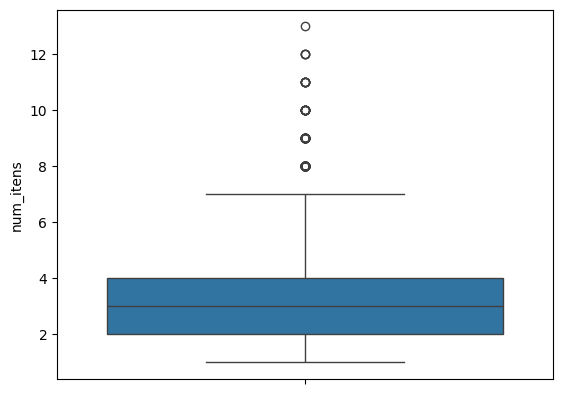

In [109]:
sns.boxplot(data=df, y=df['num_itens'])

<Axes: xlabel='num_itens', ylabel='Count'>

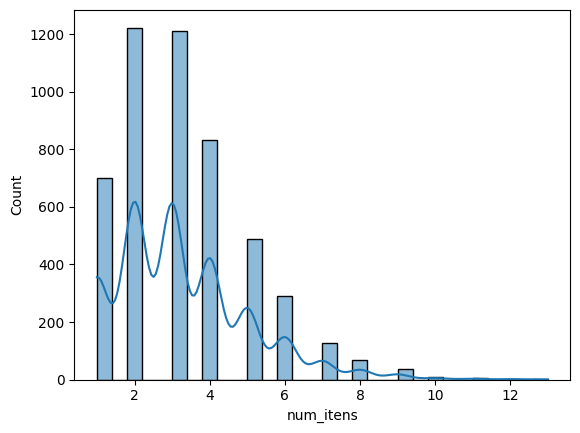

In [92]:
sns.histplot(df['num_itens'], bins=30, kde=True)

In [49]:
df['satisfacao_nivel'].describe()

count    5000.000000
mean        4.736400
std         0.550432
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: satisfacao_nivel, dtype: float64

<Axes: xlabel='satisfacao_nivel', ylabel='Count'>

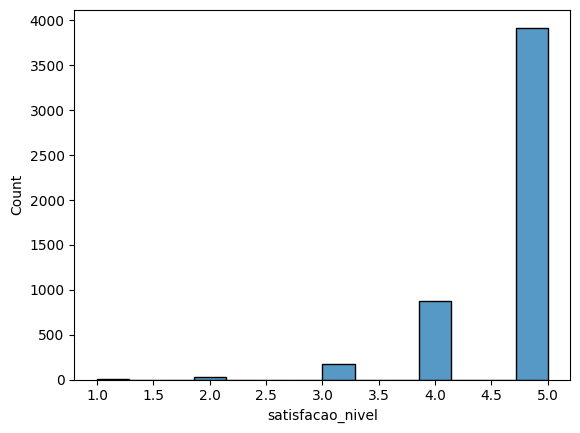

In [94]:
sns.histplot(df['satisfacao_nivel'])

Usando groupby

In [131]:
df.head(1)

,macro_bairro,nome_cliente,bairro_destino,order_datetime,platform,order_mode,distance_km,tempo_preparo_minutos,status,eta_minutes_quote,actual_delivery_minutes,total_brl,classe_pedido,platform_commission_pct,num_itens,satisfacao_nivel
0,Outros,Júlia Ramos,Bela Vista,2024-01-01 15:08:00,rappi,delivery,6.916192,34,delivered,50,62.4,288.01,familia,0.16,8,3


In [140]:
df.groupby(['order_mode', 'satisfacao_nivel']).agg(PrecoMedio=('total_brl', 'mean'),
                                                   DesvioPadrao=('total_brl', 'std'),
                                                   QtdePedidos=('total_brl', 'count')).round(2)

PrecoMedio  DesvioPadrao  QtdePedidos
order_mode satisfacao_nivel                                       
delivery   1                     243.51           NaN            1
           2                     232.19         38.71           31
           3                     204.68         57.50          164
           4                     136.20         56.30          792
           5                      97.27         41.33         3036
retirada   3                     242.83         49.64            9
           4                     170.58         68.38           83
           5                     104.67         47.68          884

In [143]:
df_groupby = df.groupby(['satisfacao_nivel'])['total_brl']
df_groupby.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
satisfacao_nivel,,,,,,,,
1,1.0,243.51,NaN,243.51,243.51,243.51,243.51,243.51
2,31.0,232.19,38.71,129.43,226.54,243.95,257.02,280.30
3,173.0,206.66,57.62,76.54,159.30,225.52,251.73,312.68
4,875.0,139.46,58.39,33.67,95.55,129.05,165.51,329.94
5,3920.0,98.94,42.95,17.38,68.50,89.48,121.82,291.08


<Axes: xlabel='satisfacao_nivel', ylabel='total_brl'>

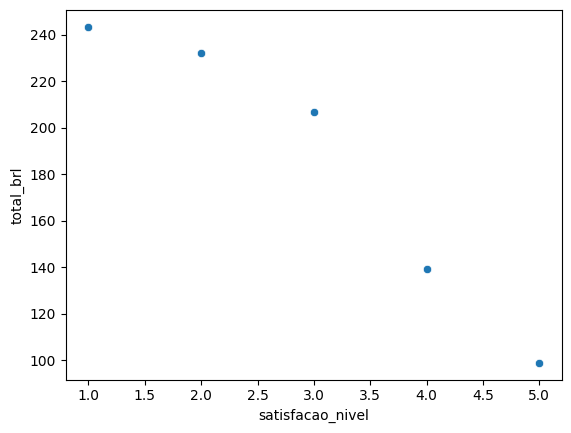

In [146]:
sns.scatterplot(data=df_groupby.mean().reset_index(), x='satisfacao_nivel', y='total_brl')